In [1]:
import polars as pl
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

In [2]:
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(-1)

polars.config.Config

# ETL & DATA WANGLING

In [3]:
df_etl = pl.scan_parquet('dados_parquet/*/*.parquet').collect()

In [4]:
df_etl.head()

ANO_NASCIMENTO,PESO,ALTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,ESTADO_CIVIL,SEXO,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""1989""","""95""","""181""","""DESCALVADO""","""SP""","""BRASIL""","""Solteiro""","""M""","""Ensino Médio Completo""","""2007""","""Sem dispensa""","""Urbana""","""PIRASSUNUNGA""","""SP""","""BRASIL"""
"""1989""","""64""","""173""","""CATANDUVA""","""SP""","""BRASIL""","""Casado""","""M""","""Ensino Superior Completo""","""2007""","""Sem dispensa""","""Urbana""","""SAO PAULO""","""SP""","""BRASIL"""
"""1989""","""82""","""171""","""CATANDUVA""","""SP""","""BRASIL""","""Solteiro""","""M""","""Ensino Médio Completo""","""2007""","""Sem dispensa""","""Urbana""","""CATANDUVA""","""SP""","""BRASIL"""
"""1989""",null,null,"""SANTO ANDRE""","""SP""","""BRASIL""","""Solteiro""","""M""","""Ensino Médio Completo""","""2007""","""Sem dispensa""","""Urbana""","""PIRAJUI""","""SP""","""BRASIL"""
"""1989""",null,null,"""PIRAJUI""","""SP""","""BRASIL""","""Solteiro""","""M""","""3ª Série do Ensino Médio""","""2007""","""Sem dispensa""","""Urbana""","""PIRAJUI""","""SP""","""BRASIL"""


In [5]:
n_rows = df_etl.shape[0]
n_rows

26569408

In [6]:
for col in df_etl.columns:
    qtd_nulos = df_etl.select(
        pl.col(col).null_count()
    ).item()
    if qtd_nulos > 0:
        print(f'Coluna {col} tem {qtd_nulos} valores nulos.')

Coluna PESO tem 18598039 valores nulos.
Coluna ALTURA tem 18588096 valores nulos.
Coluna DISPENSA tem 474630 valores nulos.


In [7]:
df_etl.group_by('VINCULACAO_ANO').agg(
    ((pl.col(['PESO', 'ALTURA', 'DISPENSA']).null_count() / pl.len()) * 100).round(2).name.suffix('_qtd_nulos')
)

VINCULACAO_ANO,PESO_qtd_nulos,ALTURA_qtd_nulos,DISPENSA_qtd_nulos
str,f64,f64,f64
"""2017""",74.84,74.82,32.7
"""2015""",79.52,79.52,0.0
"""2009""",78.75,78.74,0.0
"""2021""",67.53,67.53,0.0
"""2020""",68.1,68.12,0.0
"""2014""",80.2,80.19,0.0
"""2007""",81.15,80.7,0.0
"""2013""",80.15,80.15,0.0
"""2010""",79.92,79.92,0.0


In [8]:
df_etl = df_etl.drop(['PESO', 'ALTURA'])

In [9]:
df_etl.select('DISPENSA').unique().to_series().to_list()

['null', None, 'Sem dispensa', 'Com dispensa']

In [10]:
for col in df_etl.columns:
    df_etl = df_etl.with_columns(
        pl.col(col).replace('null', None)
    )

In [11]:
for col in df_etl.columns:
    qtd_nulos = df_etl.select(
        pl.col(col).null_count()
    ).item()
    if qtd_nulos > 0:
        print(f'Coluna {col} tem {qtd_nulos} valores nulos.')

Coluna DISPENSA tem 474635 valores nulos.


In [12]:
df_etl.select('DISPENSA').unique().to_series().to_list()

['Com dispensa', 'Sem dispensa', None]

In [13]:
df_etl = df_etl.filter(
    pl.col('DISPENSA').is_not_null()
).with_columns(
    situacao = pl.when(
        pl.col('DISPENSA') == 'Sem dispensa'
    ).then(pl.lit('Convocado')).otherwise(pl.lit('Dispensado'))
).with_columns(
    pl.col('situacao').cast(pl.Categorical)
).drop('DISPENSA')

In [14]:
df_etl.head()

ANO_NASCIMENTO,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,ESTADO_CIVIL,SEXO,ESCOLARIDADE,VINCULACAO_ANO,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,situacao
str,str,str,str,str,str,str,str,str,str,str,str,cat
"""1989""","""DESCALVADO""","""SP""","""BRASIL""","""Solteiro""","""M""","""Ensino Médio Completo""","""2007""","""Urbana""","""PIRASSUNUNGA""","""SP""","""BRASIL""","""Convocado"""
"""1989""","""CATANDUVA""","""SP""","""BRASIL""","""Casado""","""M""","""Ensino Superior Completo""","""2007""","""Urbana""","""SAO PAULO""","""SP""","""BRASIL""","""Convocado"""
"""1989""","""CATANDUVA""","""SP""","""BRASIL""","""Solteiro""","""M""","""Ensino Médio Completo""","""2007""","""Urbana""","""CATANDUVA""","""SP""","""BRASIL""","""Convocado"""
"""1989""","""SANTO ANDRE""","""SP""","""BRASIL""","""Solteiro""","""M""","""Ensino Médio Completo""","""2007""","""Urbana""","""PIRAJUI""","""SP""","""BRASIL""","""Convocado"""
"""1989""","""PIRAJUI""","""SP""","""BRASIL""","""Solteiro""","""M""","""3ª Série do Ensino Médio""","""2007""","""Urbana""","""PIRAJUI""","""SP""","""BRASIL""","""Convocado"""


In [15]:
df_etl = df_etl.with_columns(
    pl.col('ANO_NASCIMENTO').cast(pl.Int16),
    pl.col('UF_NASCIMENTO').cast(pl.Categorical),
    pl.col('VINCULACAO_ANO').cast(pl.Int16),
    pl.col('UF_RESIDENCIA').cast(pl.Categorical),
).drop(['MUN_NASCIMENTO', 'MUN_RESIDENCIA'])

In [16]:
n_rows = df_etl.shape[0]
n_rows

26094773

In [17]:
df_etl.with_columns(
    nasceu_brasil = pl.col('PAIS_NASCIMENTO') == 'BRASIL',
    reside_brasil = pl.col('PAIS_RESIDENCIA') == 'BRASIL'
).select(
    pl.col(['nasceu_brasil', 'reside_brasil']).value_counts()
)

nasceu_brasil,reside_brasil
struct[2],struct[2]
"{true,26018143}","{true,25979512}"
"{false,76630}","{false,115261}"


In [18]:
df_etl = df_etl.filter(
    pl.col('PAIS_NASCIMENTO') == 'BRASIL',
    pl.col('PAIS_RESIDENCIA') == 'BRASIL'
).drop(['PAIS_NASCIMENTO', 'PAIS_RESIDENCIA'])

In [19]:
df_etl.head()

ANO_NASCIMENTO,UF_NASCIMENTO,ESTADO_CIVIL,SEXO,ESCOLARIDADE,VINCULACAO_ANO,ZONA_RESIDENCIAL,UF_RESIDENCIA,situacao
i16,cat,str,str,str,i16,str,cat,cat
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Casado""","""M""","""Ensino Superior Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Solteiro""","""M""","""3ª Série do Ensino Médio""",2007,"""Urbana""","""SP""","""Convocado"""


In [20]:
print(df_etl.select('ESTADO_CIVIL').unique().to_series().to_list())

['Separado Judicialmente', 'ViÃºvo', 'Outros', 'Divorciado', 'Casado', 'Desquitado', 'Solteiro', 'Viúvo']


In [21]:
df = df_etl.with_columns(
    pl.col('ESTADO_CIVIL').replace({
        'ViÃºvo': 'Viúvo',
        'Separado Judicialmente': 'Divorciado',
        'Desquitado': 'Divorciado',
    })
)

In [22]:
print(df_etl.select('ESTADO_CIVIL').unique().to_series().to_list())

['Casado', 'Desquitado', 'Outros', 'Divorciado', 'Solteiro', 'ViÃºvo', 'Viúvo', 'Separado Judicialmente']


In [23]:
df_etl.select(
    pl.col('ESTADO_CIVIL').value_counts()
).unnest('ESTADO_CIVIL').group_by('ESTADO_CIVIL').agg(
    ((pl.col('count').sum() / n_rows) * 100).round(2)
)

ESTADO_CIVIL,count
str,f64
"""Viúvo""",0.0
"""Divorciado""",0.17
"""Solteiro""",96.95
"""Desquitado""",0.01
"""Casado""",1.39
"""ViÃºvo""",0.0
"""Outros""",0.86
"""Separado Judicialmente""",0.01


In [24]:
df = df_etl.filter(
    pl.col('ESTADO_CIVIL') == 'Solteiro'
).drop('ESTADO_CIVIL')

In [25]:
n_rows = df_etl.shape[0]
n_rows

25935637

In [26]:
df_etl.head()

ANO_NASCIMENTO,UF_NASCIMENTO,ESTADO_CIVIL,SEXO,ESCOLARIDADE,VINCULACAO_ANO,ZONA_RESIDENCIAL,UF_RESIDENCIA,situacao
i16,cat,str,str,str,i16,str,cat,cat
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Casado""","""M""","""Ensino Superior Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Solteiro""","""M""","""3ª Série do Ensino Médio""",2007,"""Urbana""","""SP""","""Convocado"""


In [27]:
print(df_etl.select('SEXO').unique().to_series().to_list())

['M', 'F']


In [28]:
df_etl.select(
    pl.col('SEXO').value_counts()
).unnest('SEXO').group_by('SEXO').agg(
    ((pl.col('count').sum() / n_rows) * 100).round(2)
)

SEXO,count
str,f64
"""M""",99.95
"""F""",0.05


In [29]:
df = df_etl.filter(
    pl.col('SEXO') != 'F'
).drop('SEXO')

In [30]:
n_rows = df_etl.shape[0]
n_rows

25935637

In [31]:
df_etl.head()

ANO_NASCIMENTO,UF_NASCIMENTO,ESTADO_CIVIL,SEXO,ESCOLARIDADE,VINCULACAO_ANO,ZONA_RESIDENCIAL,UF_RESIDENCIA,situacao
i16,cat,str,str,str,i16,str,cat,cat
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Casado""","""M""","""Ensino Superior Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Solteiro""","""M""","""3ª Série do Ensino Médio""",2007,"""Urbana""","""SP""","""Convocado"""


In [32]:
print(df_etl.select('ZONA_RESIDENCIAL').unique().to_series().to_list())

['Urbana', 'Rural']


In [33]:
df_etl.select(
    pl.col('ZONA_RESIDENCIAL').value_counts()
).unnest('ZONA_RESIDENCIAL').group_by('ZONA_RESIDENCIAL').agg(
    ((pl.col('count').sum() / n_rows) * 100).round(2)
)

ZONA_RESIDENCIAL,count
str,f64
"""Rural""",12.23
"""Urbana""",87.77


In [34]:
df_etl = df_etl.with_columns(
    pl.col('ZONA_RESIDENCIAL').cast(pl.Categorical)
)

In [35]:
df_etl.head()

ANO_NASCIMENTO,UF_NASCIMENTO,ESTADO_CIVIL,SEXO,ESCOLARIDADE,VINCULACAO_ANO,ZONA_RESIDENCIAL,UF_RESIDENCIA,situacao
i16,cat,str,str,str,i16,cat,cat,cat
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Casado""","""M""","""Ensino Superior Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""","""Convocado"""
1989,"""SP""","""Solteiro""","""M""","""3ª Série do Ensino Médio""",2007,"""Urbana""","""SP""","""Convocado"""


In [36]:
print(df_etl.select('ESCOLARIDADE').unique().to_series().to_list())

['5° Ano - Ensino Fundamental', 'Alfabetizado', '9ª Série do Ensino Fundamental', 'Ensino Médio Completo', '6ª Série do Ensino Fundamental', '9Â° Ano - Ensino Fundamental', '3° Ano - Ensino Fundamental', '8° Semestre - Ensino Superior', '4° Semestre - Ensino Superior', '8Â° Semestre - Ensino Superior', '2Â° Ano - Ensino Fundamental', 'Ensino Fundamental Completo', '4Â° Ano - Ensino MÃ©dio (Profissionalizante)', '7Â° Semestre - Ensino Superior', '5Â° Semestre - Ensino Superior', '6° Semestre - Ensino Superior', '3° Ano - Ensino Médio', 'Pós-Doutorado', '1° Ano - Ensino Fundamental', 'PÃ³s-GraduaÃ§Ã£o', '5° Semestre do Ensino Superior', '3Â° Ano - Ensino MÃ©dio', '4ª Série do Ensino Médio', '3° Semestre - Ensino Superior', '8ª Série do Ensino Fundamental', '3ª Série do Ensino Fundamental', '9° Ano - Ensino Fundamental', '4ª Série do Ensino Fundamental', '10° Semestre - Ensino Superior', '1° Semestre - Ensino Superior', '5ª Série do Ensino Fundamental', '2ª Série do Ensino Fundamental', '

In [37]:
df_etl = df_etl.with_columns(
    pl.col('ESCOLARIDADE').str.replace_many({
        'Â°': '°',
        'Ã©': 'é',        
        'Ã³s': 'ó',
        'Ã§Ã£o': 'ção',
        'Ã§â\x95\x9eo': 'ção'
    }, ascii_case_insensitive=True)
)

In [38]:
print(df_etl.select('ESCOLARIDADE').unique().to_series().to_list())

['8° Semestre - Ensino Superior', 'Pó-Doutorado', '2° Ano - Ensino Médio', 'Analfabeto', 'Pós-Graduação', 'Ensino Superior Completo', '4° Ano - Ensino Fundamental', '9ª Série do Ensino Fundamental', '1ª Série do Ensino Fundamental', '2ª Série do Ensino Médio', '6° Semestre - Ensino Superior', 'Doutorado', '5° Ano - Ensino Fundamental', '1° Ano - Ensino Médio', '3ª Série do Ensino Fundamental', '1° Ano - Ensino Fundamental', '3ª Série do Ensino Médio', 'Mestrado', '5ª Série do Ensino Fundamental', '6° Ano - Ensino Fundamental', '9° Semestre do Ensino Superior', 'Pós-Doutorado', '5° Semestre - Ensino Superior', '7ª Série do Ensino Fundamental', '9° Semestre - Ensino Superior', 'Ensino Fundamental Completo', '10° Semestre - Ensino Superior', '3° Ano - Ensino Fundamental', '7° Semestre do Ensino Superior', '8ª Série do Ensino Fundamental', '6° Semestre do Ensino Superior', '3° Ano - Ensino Médio', '5° Semestre do Ensino Superior', '3° Semestre do Ensino Superior', '2° Ano - Ensino Fundamen

In [39]:
ensino_fundamental = df_etl.select('ESCOLARIDADE').filter(
    pl.col('ESCOLARIDADE').str.contains('Ensino Fundamental')
).unique().to_series().to_list()

In [40]:
ensino_medio = df_etl.select('ESCOLARIDADE').filter(
    pl.col('ESCOLARIDADE').str.contains('Ensino Médio')
).unique().to_series().to_list()

In [41]:
graduacao = df_etl.select('ESCOLARIDADE').filter(
    pl.col('ESCOLARIDADE').str.contains('Ensino Superior')
).unique().to_series().to_list()

In [42]:
ordem_escolaridade = [
    'Analfabeto',
    'Alfabetizado',
    'Ensino Fundamental',
    'Ensino Médio',
    'Graduação',
    'Pós-Graduação'
]

In [43]:
df_etl = df_etl.with_columns(
    nivel_educacional = pl.when(pl.col('ESCOLARIDADE') == 'Analfabeto')
        .then(pl.lit('Analfabeto'))
        .when(pl.col('ESCOLARIDADE') == 'Alfabetizado')
        .then(pl.lit('Alfabetizado'))
        .when(pl.col('ESCOLARIDADE').is_in(ensino_fundamental))
        .then(pl.lit('Ensino Fundamental'))
        .when(pl.col('ESCOLARIDADE').is_in(ensino_medio))
        .then(pl.lit('Ensino Médio'))
        .when(pl.col('ESCOLARIDADE').is_in(graduacao))
        .then(pl.lit('Graduação'))
        .otherwise(pl.lit('Pós-Graduação'))
).with_columns(
    pl.col('nivel_educacional').cast(pl.Enum(ordem_escolaridade))
).drop('ESCOLARIDADE')

In [44]:
cols_maiusculas = df_etl.columns
cols_minusculas = [col.lower() for col in df_etl.columns]
cols_transformadas = dict(zip(cols_maiusculas, cols_minusculas))

In [45]:
df_etl = df_etl.rename(cols_transformadas)

In [46]:
df_etl.head()

ano_nascimento,uf_nascimento,estado_civil,sexo,vinculacao_ano,zona_residencial,uf_residencia,situacao,nivel_educacional
i16,cat,str,str,i16,cat,cat,cat,enum
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Casado""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Graduação"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""


In [47]:
df_etl.shape

(25935637, 9)

In [48]:
df_etl.write_parquet(
    'dados',
    partition_by='vinculacao_ano'
)

# EDA

## ANÁLISES UNIVARIADAS

In [49]:
df_etl.head()

ano_nascimento,uf_nascimento,estado_civil,sexo,vinculacao_ano,zona_residencial,uf_residencia,situacao,nivel_educacional
i16,cat,str,str,i16,cat,cat,cat,enum
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Casado""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Graduação"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""


In [50]:
anos = sorted(df_etl.select('vinculacao_ano').unique().to_series().to_list())

In [51]:
df_eda_edu = df_etl.group_by(['vinculacao_ano', 'nivel_educacional']).agg(
    qtd = pl.len()
).with_columns(
    qtd_pct = ((pl.col('qtd') / pl.col('qtd').sum().over('vinculacao_ano')) * 100).round(2)
).sort(['vinculacao_ano', 'nivel_educacional'], descending=False)

### NÍVEL DE ESCOLARIDADE DOS ALISTADOS

In [52]:
df_eda_edu.head(10)

vinculacao_ano,nivel_educacional,qtd,qtd_pct
i16,enum,u32,f64
2007,"""Analfabeto""",9307,0.58
2007,"""Alfabetizado""",23776,1.47
2007,"""Ensino Fundamental""",555951,34.46
2007,"""Ensino Médio""",951280,58.97
2007,"""Graduação""",72718,4.51
2007,"""Pós-Graduação""",215,0.01
2008,"""Analfabeto""",19810,1.15
2008,"""Alfabetizado""",36436,2.12
2008,"""Ensino Fundamental""",650324,37.79


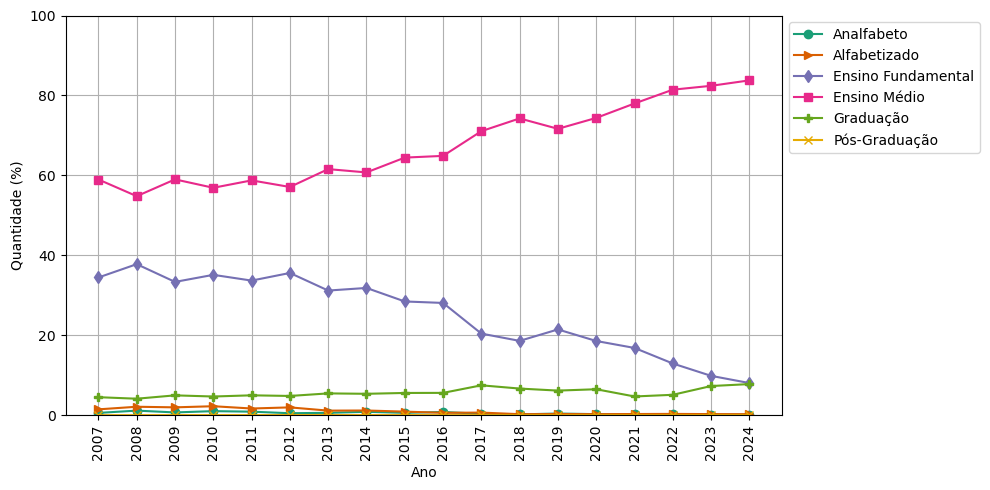

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))

marcadores = ['o', '>', 'd', 's', 'P', 'x']
cores = plt.get_cmap('Dark2').colors

for (nivel_educacional, grupo), marcador, cor in zip(df_eda_edu.group_by('nivel_educacional', maintain_order=True), marcadores, cores):
    ax.plot(
        grupo.select('vinculacao_ano'),
        grupo.select('qtd_pct'),
        label=nivel_educacional,
        marker=marcador,
        color=cor
    )

ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()
ax.set_ylim(0, 100)
ax.set_ylabel('Quantidade (%)')
ax.set_xlabel('Ano')

plt.tight_layout()
fig.savefig('pt/historico_nivel_educacional_alistados.png', dpi=300, bbox_inches='tight')
plt.show()

In [54]:
renomeacao_niveis_educacionais = {
    'Analfabeto': 'Illiterate',
    'Alfabetizado': 'Literate',
    'Ensino Fundamental': 'Elementary School',
    'Ensino Médio': 'High School',
    'Graduação': 'Bachelor\'s Degree',
    'Pós-Graduação': 'Post-graduate'
}

In [55]:
df_eda_edu = df_eda_edu.with_columns(
    pl.col("nivel_educacional").cast(pl.String).str.replace_many(renomeacao_niveis_educacionais).cast(pl.Categorical)
)

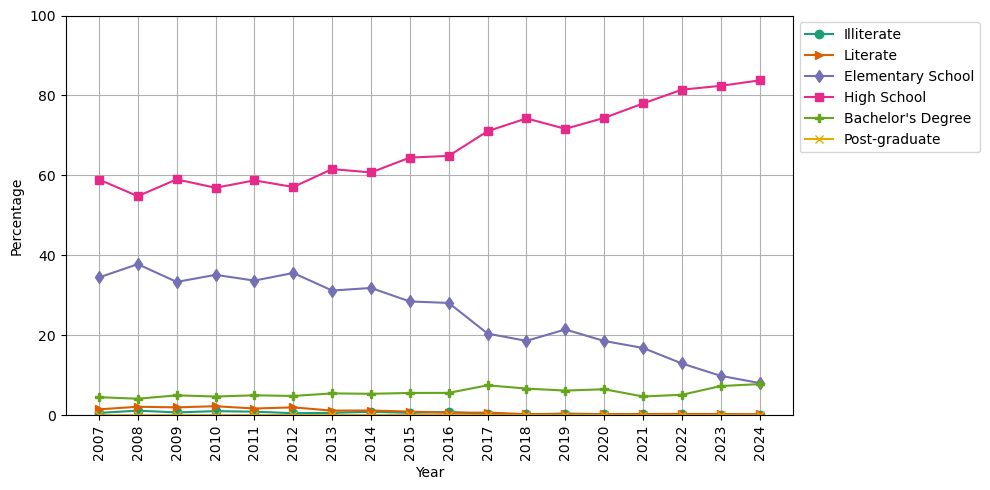

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))

marcadores = ['o', '>', 'd', 's', 'P', 'x']
cores = plt.get_cmap('Dark2').colors

for (nivel_educacional, grupo), marcador, cor in zip(df_eda_edu.group_by('nivel_educacional', maintain_order=True), marcadores, cores):
    ax.plot(
        grupo.select('vinculacao_ano'),
        grupo.select('qtd_pct'),
        label=nivel_educacional,
        marker=marcador,
        color=cor
    )

ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()
ax.set_ylim(0, 100)
ax.set_ylabel('Percentage')
ax.set_xlabel('Year')

plt.tight_layout()
fig.savefig('en/plot_educational_level.png', dpi=300, bbox_inches='tight')
plt.show()

### SITUAÇÃO MILITAR DOS ALISTADOS

In [57]:
df_etl.head()

ano_nascimento,uf_nascimento,estado_civil,sexo,vinculacao_ano,zona_residencial,uf_residencia,situacao,nivel_educacional
i16,cat,str,str,i16,cat,cat,cat,enum
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Casado""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Graduação"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""


In [58]:
df_eda_convocacao = df_etl.group_by('vinculacao_ano', 'situacao').agg(
    qtd = pl.len()
).with_columns(
    qtd_pct = ((pl.col('qtd') / pl.col('qtd').sum().over('vinculacao_ano')) * 100).round(2)
).sort('vinculacao_ano', descending=False)

In [59]:
df_eda_convocacao.head()

vinculacao_ano,situacao,qtd,qtd_pct
i16,cat,u32,f64
2007,"""Dispensado""",1068306,66.22
2007,"""Convocado""",544941,33.78
2008,"""Dispensado""",1190439,69.17
2008,"""Convocado""",530497,30.83
2009,"""Dispensado""",1003134,65.24


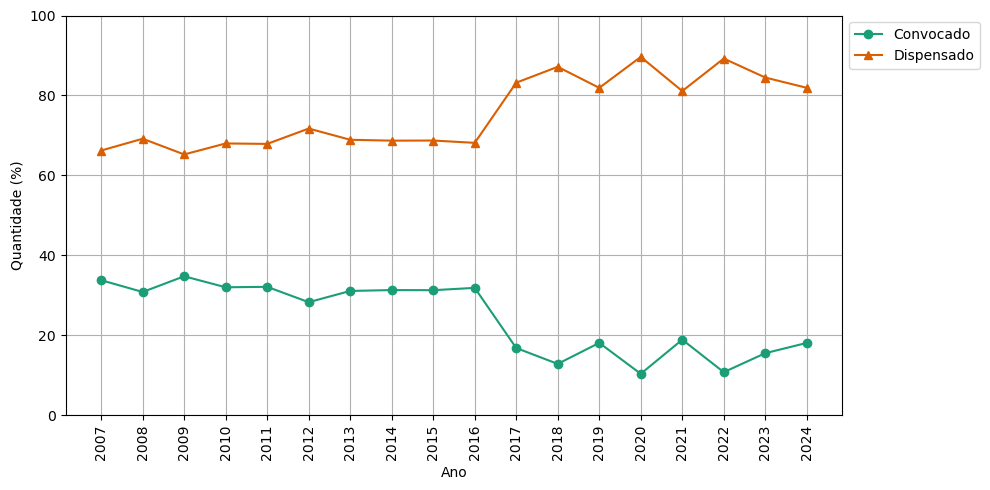

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))

marcadores = ['o', '^']
cores = plt.get_cmap('Dark2').colors

for (convocacao, grupo), marcador, cor in zip(df_eda_convocacao.group_by('situacao'), marcadores, cores):
    plt.plot(
        grupo.select('vinculacao_ano'),
        grupo.select('qtd_pct'),
        label=convocacao,
        marker=marcador,
        color=cor
    )

ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()
ax.set_ylim(0, 100)
ax.set_ylabel('Quantidade (%)')
ax.set_xlabel('Ano')

plt.tight_layout()
fig.savefig('pt/historico_alistados_convocados_dispensados.png', dpi=300, bbox_inches='tight')
plt.show()

In [61]:
renomeacao_situacao_militar = {
    'Convocado': 'Conscripted',
    'Dispensado': 'discharged'
}

In [62]:
df_eda_convocacao = df_eda_convocacao.with_columns(
    pl.col('situacao').cast(pl.String).str.replace_many(renomeacao_situacao_militar).cast(pl.Categorical)
)

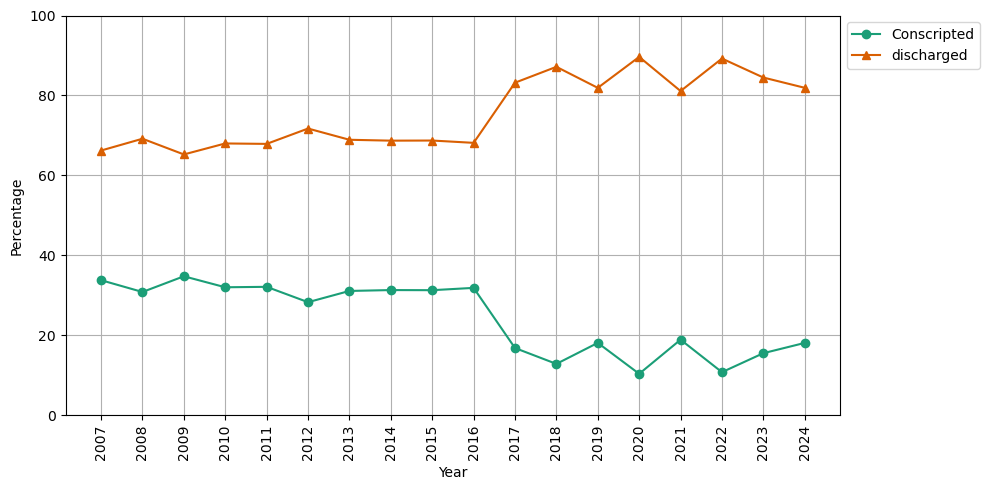

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))

marcadores = ['o', '^']
cores = plt.get_cmap('Dark2').colors

for (situacao, grupo), marcador, cor in zip(df_eda_convocacao.group_by('situacao'), marcadores, cores):
    plt.plot(
        grupo.select('vinculacao_ano'),
        grupo.select('qtd_pct'),
        label=situacao,
        marker=marcador,
        color=cor
    )

ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()
ax.set_ylim(0, 100)
ax.set_ylabel('Percentage')
ax.set_xlabel('Year')

plt.tight_layout()
fig.savefig('en/plot_discharged_conscripted_men.png', dpi=300, bbox_inches='tight')
plt.show()

### ONDE OS ALISTADOS RESIDEM?

In [64]:
df_etl.head()

ano_nascimento,uf_nascimento,estado_civil,sexo,vinculacao_ano,zona_residencial,uf_residencia,situacao,nivel_educacional
i16,cat,str,str,i16,cat,cat,cat,enum
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Casado""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Graduação"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""


In [65]:
df_eda_zonaresidencia = df_etl.group_by(['vinculacao_ano', 'zona_residencial']).agg(
    qtd = pl.len()
).with_columns(
    qtd_pct = ((pl.col('qtd') / pl.col('qtd').sum().over('vinculacao_ano')) * 100).round(2)
).sort('vinculacao_ano', descending=False)

In [66]:
df_eda_zonaresidencia.head()

vinculacao_ano,zona_residencial,qtd,qtd_pct
i16,cat,u32,f64
2007,"""Urbana""",1402723,86.95
2007,"""Rural""",210524,13.05
2008,"""Urbana""",1447598,84.12
2008,"""Rural""",273338,15.88
2009,"""Urbana""",1370878,89.15


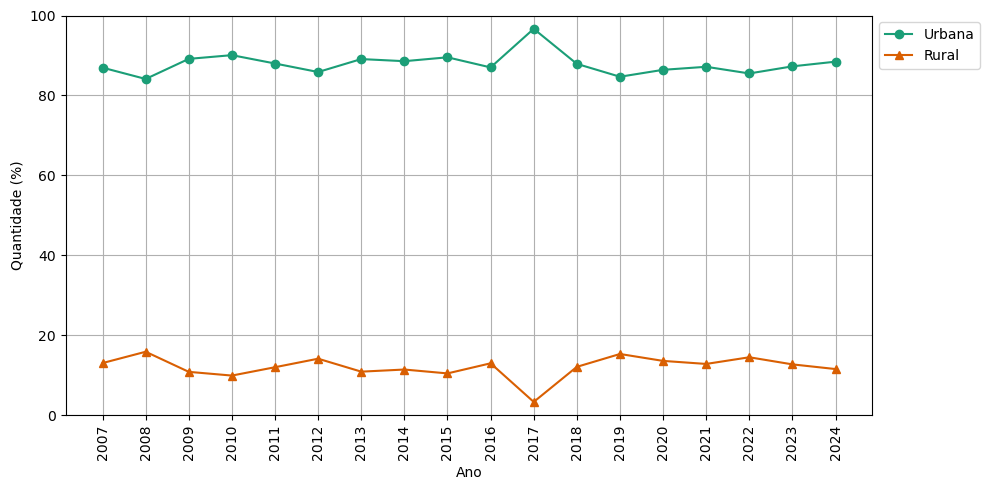

In [67]:
fig, ax = plt.subplots(figsize=(10, 5))

marcadores = ['o', '^']
cores = plt.get_cmap('Dark2').colors

for (zona_residencial, grupo), marcador, cor in zip(df_eda_zonaresidencia.group_by('zona_residencial'), marcadores, cores):
    plt.plot(
        grupo.select('vinculacao_ano'),
        grupo.select('qtd_pct'),
        label=zona_residencial,
        marker=marcador,
        color=cor
    )

ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()
ax.set_ylim(0, 100)
ax.set_ylabel('Quantidade (%)')
ax.set_xlabel('Ano')

plt.tight_layout()
fig.savefig('pt/historico_zona_residencial_alistados.png', dpi=300, bbox_inches='tight')
plt.show()

In [68]:
df_eda_zonaresidencia = df_eda_zonaresidencia.with_columns(
    pl.col('zona_residencial').replace('Urbana', 'Urban')
)

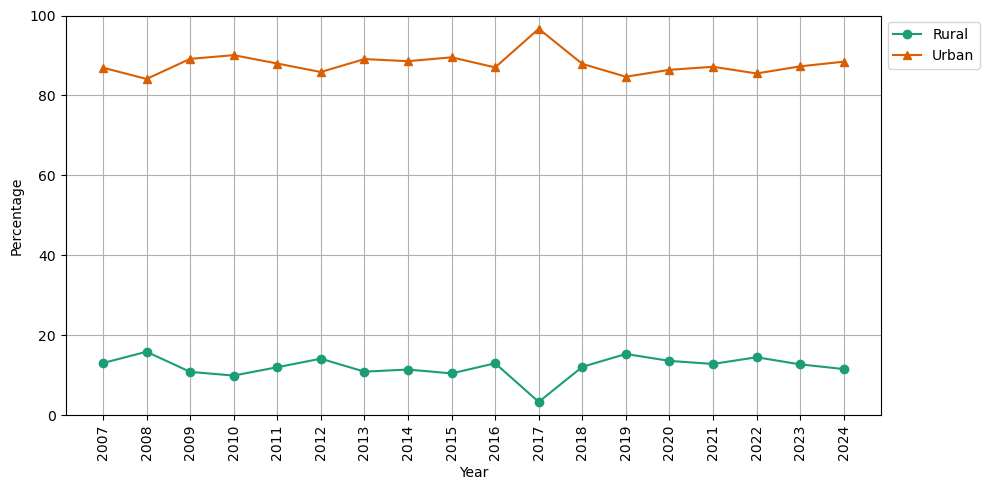

In [69]:
fig, ax = plt.subplots(figsize=(10, 5))

marcadores = ['o', '^']
cores = plt.get_cmap('Dark2').colors

for (zona_residencial, grupo), marcador, cor in zip(df_eda_zonaresidencia.group_by('zona_residencial'), marcadores, cores):
    plt.plot(
        grupo.select('vinculacao_ano'),
        grupo.select('qtd_pct'),
        label=zona_residencial,
        marker=marcador,
        color=cor
    )

ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()
ax.set_ylim(0, 100)
ax.set_ylabel('Percentage')
ax.set_xlabel('Year')

plt.tight_layout()
fig.savefig('en/plot_where_men_live.png', dpi=300, bbox_inches='tight')
plt.show()

### QUANTIDADE DE  ALISTADOS POR ANO

In [70]:
df_etl.head()

ano_nascimento,uf_nascimento,estado_civil,sexo,vinculacao_ano,zona_residencial,uf_residencia,situacao,nivel_educacional
i16,cat,str,str,i16,cat,cat,cat,enum
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Casado""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Graduação"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""
1989,"""SP""","""Solteiro""","""M""",2007,"""Urbana""","""SP""","""Convocado""","""Ensino Médio"""


In [71]:
df_eda_qtd_alistados = df_etl.group_by(['vinculacao_ano']).agg(
    qtd = pl.len()
).sort('vinculacao_ano', descending=False)

In [72]:
df_eda_qtd_alistados.head()

vinculacao_ano,qtd
i16,u32
2007,1613247
2008,1720936
2009,1537704
2010,1689342
2011,1778447


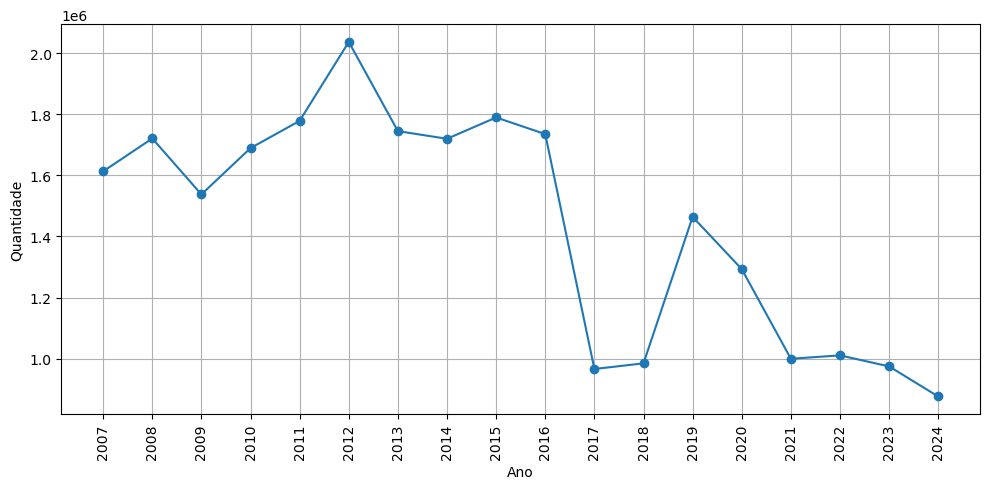

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(
    df_eda_qtd_alistados.select('vinculacao_ano'),
    df_eda_qtd_alistados.select('qtd'),
    marker='o'
)

ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.grid()
ax.set_ylabel('Quantidade')
ax.set_xlabel('Ano')

plt.tight_layout()
fig.savefig('pt/historico_qtd_alistados_por_ano.png', dpi=300, bbox_inches='tight')
plt.show()

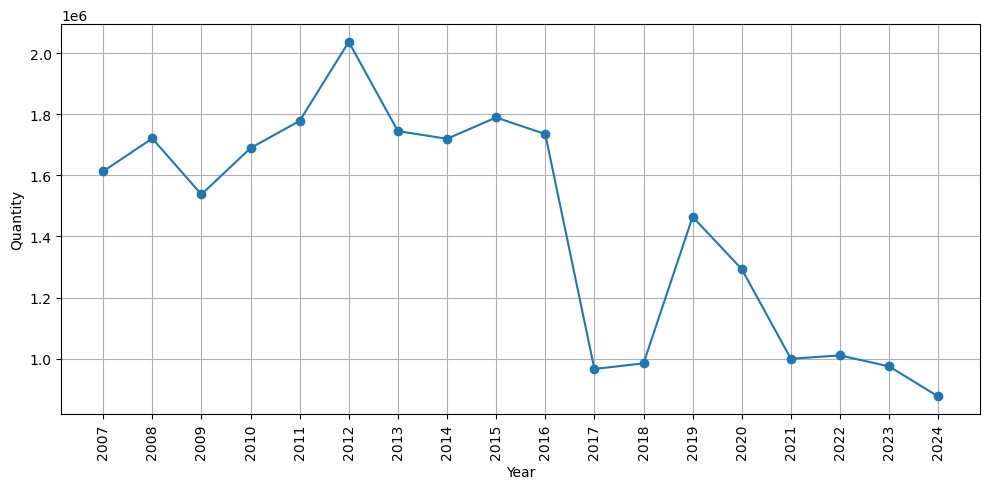

In [74]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(
    df_eda_qtd_alistados.select('vinculacao_ano'),
    df_eda_qtd_alistados.select('qtd'),
    marker='o'
)

ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.grid()
ax.set_ylabel('Quantity')
ax.set_xlabel('Year')

plt.tight_layout()
fig.savefig('en/plot_number_men_yearly.png', dpi=300, bbox_inches='tight')
plt.show()

### QUANTIDADE DE ALISTADOS POR ANO NAS GRANDE REGIÃO

In [75]:
grandes_regioes = {
    'Sul': ['RS', 'PR', 'SC'],
    'Nordeste': ['AL', 'PE', 'PB', 'CE', 'RN', 'MA', 'PI', 'SE', 'BA'],
    'Sudeste': ['SP', 'RJ', 'SP', 'ES'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'TO']
}

In [76]:
df_etl_com_grandesregioes = df_etl.with_columns(
    grande_regiao = (
        pl.when(pl.col('uf_nascimento').is_in(grandes_regioes['Sul'])).then(pl.lit('Sul'))
        .when(pl.col('uf_nascimento').is_in(grandes_regioes['Nordeste'])).then(pl.lit('Nordeste'))
        .when(pl.col('uf_nascimento').is_in(grandes_regioes['Sudeste'])).then(pl.lit('Sudeste'))
        .when(pl.col('uf_nascimento').is_in(grandes_regioes['Centro-Oeste'])).then(pl.lit('Centro-Oeste'))
        .otherwise(pl.lit('Norte'))
    )
)

In [77]:
df_eda_qtd_alistados_uf = df_etl_com_grandesregioes.group_by(['vinculacao_ano', 'grande_regiao']).agg(
    qtd = pl.len()
).with_columns(
    qtd_pct = ((pl.col('qtd') / pl.col('qtd').sum().over('vinculacao_ano')) * 100).round(2)
).sort(['vinculacao_ano', 'grande_regiao'], descending=False)

In [78]:
df_eda_qtd_alistados_uf.head()

vinculacao_ano,grande_regiao,qtd,qtd_pct
i16,str,u32,f64
2007,"""Centro-Oeste""",104171,6.46
2007,"""Nordeste""",463625,28.74
2007,"""Norte""",319816,19.82
2007,"""Sudeste""",482646,29.92
2007,"""Sul""",242989,15.06


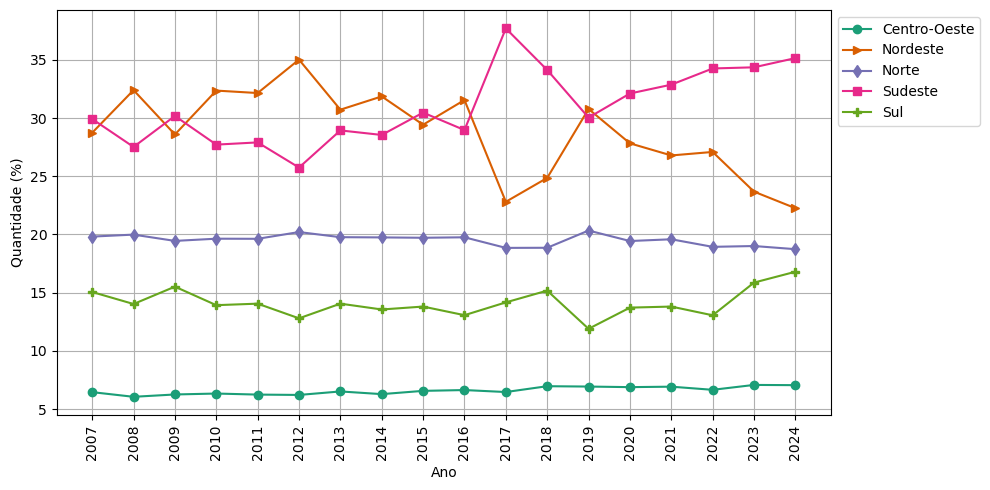

In [79]:
fig, ax = plt.subplots(figsize=(10, 5))

marcadores = ['o', '>', 'd', 's', 'P', 'x']
cores = plt.get_cmap('Dark2').colors

for (grande_regiao, grupo), marcador, cor in zip(df_eda_qtd_alistados_uf.group_by('grande_regiao', maintain_order=True), marcadores, cores):
    ax.plot(
        grupo.select('vinculacao_ano'),
        grupo.select('qtd_pct'),
        label=grande_regiao,
        marker=marcador,
        color=cor
    )


ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.grid()
ax.set_ylabel('Quantidade (%)')
ax.set_xlabel('Ano')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
fig.savefig('pt/historico_qtd_alistados_por_granderegiao.png', dpi=300, bbox_inches='tight')
plt.show()

In [80]:
renomeacao_grandes_regioes = {
    'Sul': 'South',
    'Norte': 'North',
    'Centro-Oeste': 'Midwest',
    'Sudeste': 'Southeast',
    'Nordeste': 'Northeast'
}

In [81]:
df_eda_qtd_alistados_uf = df_eda_qtd_alistados_uf.with_columns(
    pl.col('grande_regiao').replace(renomeacao_grandes_regioes)
)

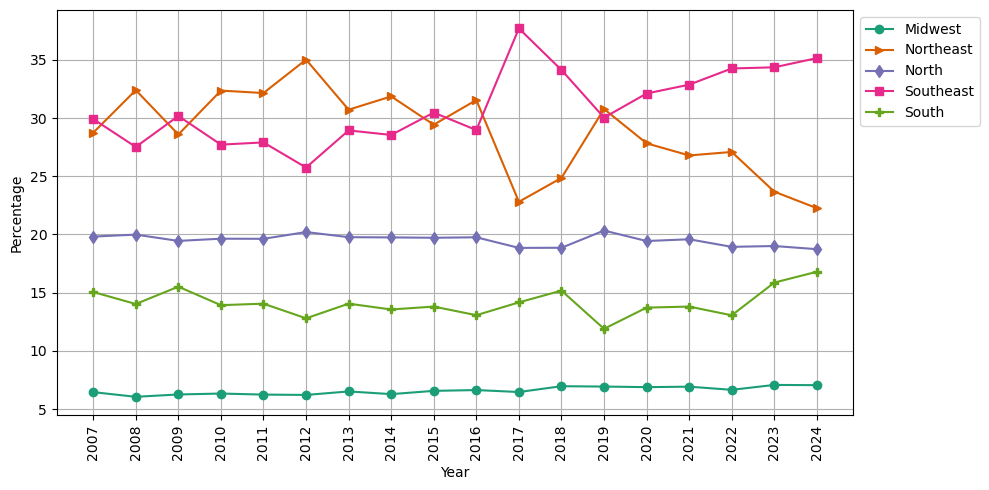

In [82]:
fig, ax = plt.subplots(figsize=(10, 5))

marcadores = ['o', '>', 'd', 's', 'P', 'x']
cores = plt.get_cmap('Dark2').colors

for (grande_regiao, grupo), marcador, cor in zip(df_eda_qtd_alistados_uf.group_by('grande_regiao', maintain_order=True), marcadores, cores):
    ax.plot(
        grupo.select('vinculacao_ano'),
        grupo.select('qtd_pct'),
        label=grande_regiao,
        marker=marcador,
        color=cor
    )


ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.grid()
ax.set_ylabel('Percentage')
ax.set_xlabel('Year')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
fig.savefig('en/plot_number_men_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

### NASCIMENTO POR ANO NAS GRANDE REGIÃO

### RESIDENCIA POR ANO NAS GRANDE REGIÃO

### QUANTOS RESIDEM NO MESMO LUGAR QUE NASCERAM 

## ANÁLISE BIVARIADAS

## ANÁLISE MULTIVARIAVADA

# ML: CLUSTERIZAÇÃO